In [7]:
%matplotlib inline
import cv2 as cv
from matplotlib import pyplot as plt

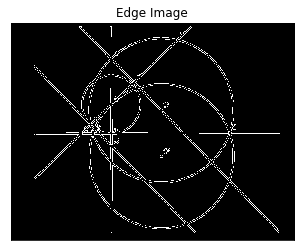

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('tests/003.png',0)
edges = cv2.Canny(img,100,200)

plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
cv2.imwrite("tests/output003.jpg", edges)

plt.show()

In [10]:
print(sum(edges))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 241
 248 245 246 246 246 246 246 246 246 246 246 247 246 246 246 247 246 246
 246 246 246 246 246 245 246 246 246 246 246 246 246 246 245 246 246 246
 246 246 246 246 246 246 246 246 246 247 246 246 246 247 246 246 246 246
 246 245 246 246 246 246 246 246 246 246 246 246 246 246 246 246 246 246
 246 246 246 246 246 246 246 247 246 246 246 247 246 246 246 246 245 246
 246 246 246 246 246 246 246 245 246 246 246 246 246 247 248 246 242 244
 247 247 226 231 235 237 221 231 234 232 234 235 235 235 237 235 232 236
 220 179 217 222 185 187 202 207 218 222 214 225 222 229 225 220 228 225
 222 220 221 222 222 219 216 213 214 219 218 225 225 224 225 226 225 226
 226 224 226 226 225 226 228 225 228 228 227 228 226 227 229  98  81 107
 221  76  68 156 230 227 219 218 214 211 209 218 22